<a href="https://colab.research.google.com/github/SamiraAsadzadeh/Neural-network-exercises/blob/main/Classification_RNN_GRU_LSTM_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



In [37]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from IPython.display import Image
from google.colab.patches import cv2_imshow
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
    plt.show(block=True)

def show_image(image) -> None:
    plt.imshow(image, cmap='gray')
    plt.show(block=True)



# DataSet

11490434/11490434 [==============================] - 0s 0us/step


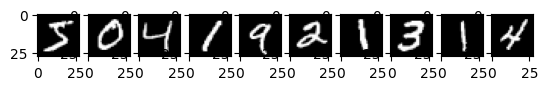

number of training images: 60000
number of test images: 10000


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train.shape-->(60000, 28, 28)
# print out first 10 images in our training data
imgplot = show_images(x_train[0:10])

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

In [4]:
# update all the training, testing dataset.
x_train, x_test = x_train/255.0, x_test/255.0
#x_validate, y_validate = x_test[:-10], y_test[:-10]
#x_test, y_test = x_test[-10:], y_test[-10:]

# **Model RNN**


In [11]:
model = keras.Sequential()
model.add(layers.SimpleRNN(units=64, input_shape=(None, 28)))
model.add(layers.Dense(units=10, activation='sigmoid'))
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [12]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [13]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 20s 20ms/step - loss: 1.1207 - accuracy: 0.6497 - val_loss: 0.6368 - val_accuracy: 0.8205
Epoch 2/10
938/938 [==============================] - 17s 19ms/step - loss: 0.4813 - accuracy: 0.8602 - val_loss: 0.3970 - val_accuracy: 0.8839
Epoch 3/10
938/938 [==============================] - 18s 19ms/step - loss: 0.3398 - accuracy: 0.9017 - val_loss: 0.2993 - val_accuracy: 0.9137
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2791 - accuracy: 0.9200 - val_loss: 0.2321 - val_accuracy: 0.9330
Epoch 5/10
938/938 [==============================] - 18s 19ms/step - loss: 0.2448 - accuracy: 0.9300 - val_loss: 0.4012 - val_accuracy: 0.8854
Epoch 6/10
938/938 [==============================] - 17s 19ms/step - loss: 0.2219 - accuracy: 0.9368 - val_loss: 0.2662 - val_accuracy: 0.9242
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.2019 - accuracy: 0.9426 - val_loss: 0.2140 - val_accuracy: 0.9388
Epo

# **Model Evaluation**

In [14]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.15139935910701752
Test accuracy: 0.9592000246047974


# **Model Prediction**

In [15]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 2s 5ms/step
Test prediction: [7 2 1 ... 4 5 6]


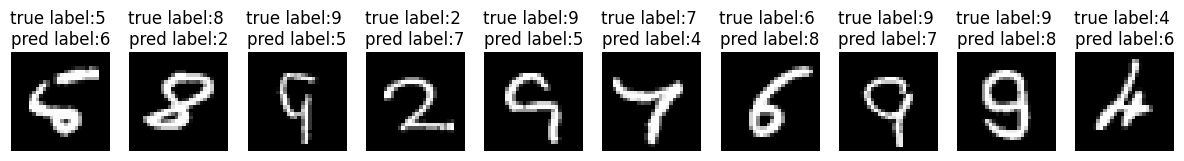

In [16]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


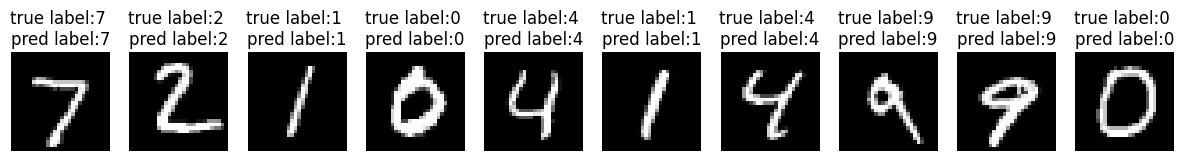

In [17]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


# **Model LSTM**


In [19]:
model = keras.Sequential()
model.add(layers.LSTM(units=64, input_shape=(None, 28)))
model.add(layers.Dense(units=10, activation='sigmoid'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                23808     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 24458 (95.54 KB)
Trainable params: 24458 (95.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [20]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [21]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 8s 6ms/step - loss: 2.1736 - accuracy: 0.2766 - val_loss: 1.9408 - val_accuracy: 0.3397
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 1.6955 - accuracy: 0.4487 - val_loss: 1.4526 - val_accuracy: 0.5622
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 1.1501 - accuracy: 0.6430 - val_loss: 0.8622 - val_accuracy: 0.7321
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.6866 - accuracy: 0.7875 - val_loss: 0.7928 - val_accuracy: 0.7353
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.4406 - accuracy: 0.8713 - val_loss: 0.3404 - val_accuracy: 0.9047
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3193 - accuracy: 0.9081 - val_loss: 0.3306 - val_accuracy: 0.8973
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2555 - accuracy: 0.9256 - val_loss: 0.2098 - val_accuracy: 0.9405
Epoch 

# **Model Evaluation**

In [22]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.14595353603363037
Test accuracy: 0.9585000276565552


# **Model Prediction**

In [23]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 2ms/step
Test prediction: [7 2 1 ... 4 5 6]


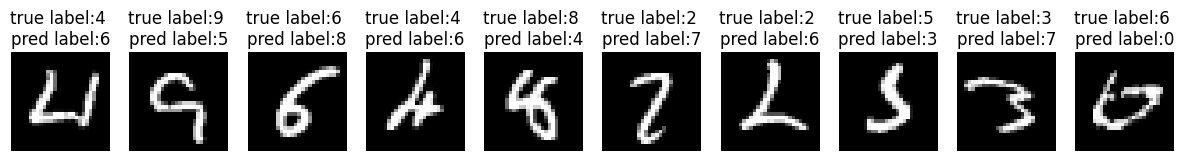

In [24]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


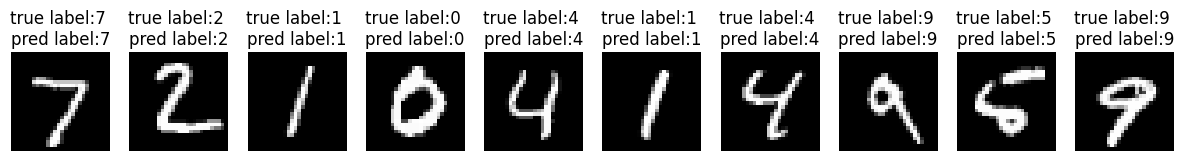

In [25]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


# **Model GRU**


In [28]:
model = keras.Sequential()
model.add(layers.GRU(units=64, input_shape=(None, 28)))
model.add(layers.Dense(units=10, activation='sigmoid'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                18048     
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 18698 (73.04 KB)
Trainable params: 18698 (73.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# **Model Compile**

In [29]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


# **Model Train**

In [30]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=64, epochs=10
)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 2.2796 - accuracy: 0.1781 - val_loss: 2.2554 - val_accuracy: 0.2271
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 2.2111 - accuracy: 0.2583 - val_loss: 2.1484 - val_accuracy: 0.3046
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 1.9797 - accuracy: 0.3733 - val_loss: 1.7064 - val_accuracy: 0.4271
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 1.4177 - accuracy: 0.5085 - val_loss: 1.1777 - val_accuracy: 0.5692
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 1.0364 - accuracy: 0.6249 - val_loss: 0.9241 - val_accuracy: 0.6743
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.8500 - accuracy: 0.7030 - val_loss: 0.7556 - val_accuracy: 0.7431
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.6877 - accuracy: 0.7710 - val_loss: 0.6074 - val_accuracy: 0.7961
Epoch 

# **Model Evaluation**

In [31]:
loss_ , acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss_)
print('Test accuracy:', acc)

Test loss: 0.3291376829147339
Test accuracy: 0.9025999903678894


# **Model Prediction**

In [32]:
prediction = model.predict(x_test)
classes_x=np.argmax(prediction,axis=1)#این دستور خروجی پیش بینی شده را که به صورت یک آرایه هست را به یک عدد تبدیل می کند
print('Test prediction:', classes_x)

313/313 [==============================] - 1s 2ms/step
Test prediction: [7 2 1 ... 9 5 6]


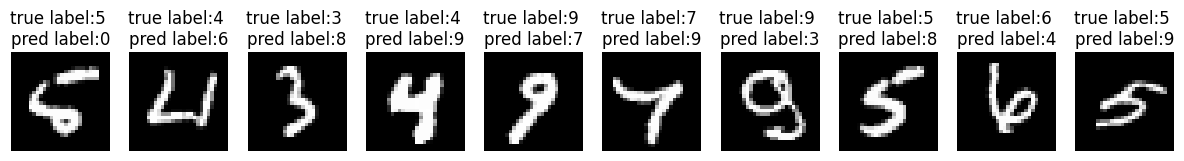

In [33]:
(_, _), (x_test_image, y_test_label) = mnist.load_data()


b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test)):
  if b>=10:
    break
  if (classes_x[t] !=  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1


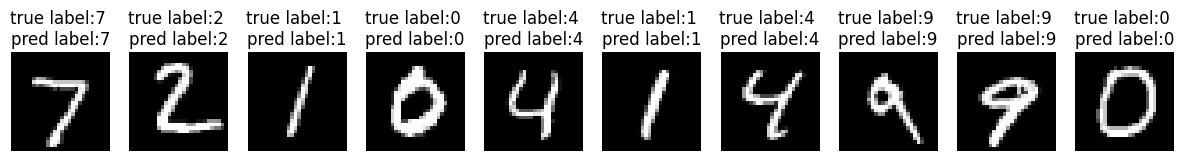

In [34]:
b=0
f,axs = plt.subplots(1,10, figsize=(15, 15))

for t in range (len(y_test_label)):
  if b>=10:
    break
  if (classes_x[t] ==  y_test_label[t]):
    axs[b].imshow(x_test_image[t], cmap='gray')
    axs[b].set_title(f'true label:{y_test_label[t]} \n' f'pred label:{classes_x[t]}')
    axs[b].axis('off')

    b+=1
